# Messing Around with Team Stats

#### Dependencies

In [143]:
from nba_api.stats.static import teams
import pandas as pd
from nba_api.stats.endpoints import leaguegamefinder
import os
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from bs4 import BeautifulSoup
import requests

#### Getting Data

In [117]:
nba_teams = teams.get_teams()
# print(nba_teams[0])

In [48]:
def get_23_games_dict(nba_teams):
    games_23_dict = {}
    for index, team in enumerate(nba_teams):
        gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable = nba_teams[index]['id'])
        all_games = gamefinder.get_data_frames()[0]

        games_23 = all_games[all_games.GAME_DATE.str[:4] == '2023']
        games_23_dict[team['full_name']] = games_23
    return games_23_dict

In [49]:
games_23 = get_23_games_dict(nba_teams)

In [61]:
hawks_df = games_23['Atlanta Hawks']
avg_3PA = hawks_df['FG3A'].dropna().mean()
avg_3PFGP = hawks_df['FG3_PCT'].dropna().mean()

print(f"Hawks: 3PA {avg_3PA}, 3FG% {avg_3PFGP}")

Hawks: 3PA 29.517241379310345, 3FG% 0.3788620689655172


In [67]:
# for index, team in enumerate(games_23):
#     print(team)

In [68]:
# def specific_dict(games_23):
#     avg_3pa_list = []
#     avg_3pfgp_list = []

#     for index, team in enumerate(games_23):
#         team_df = games_23[team]
#         avg_3PA = team_df['FG3A'].dropna().mean()
#         avg_3PFGP = team_df['FG3_PCT'].dropna().mean()
#         avg_3pa_list.append(avg_3PA)
#         avg_3pfgp_list.append(avg_3PFGP)
        
#     return avg_3pa_list, avg_3pfgp_list


In [132]:
data_list = []
for index, team in enumerate(games_23):
    temp_dict = {'id': nba_teams[index]['id'], 'abbreviation': nba_teams[index]['abbreviation']}
    temp_dict['FG3A'] = games_23[team]['FG3A'].dropna().mean()
    temp_dict['FG3_PCT'] = games_23[team]['FG3_PCT'].dropna().mean()
    data_list.append(temp_dict)
    # print(nba_teams[index]['abbreviation'])
    # team_df = games_23[team]
    # avg_3PA = team_df['FG3A'].dropna().mean()
    # avg_3PFGP = team_df['FG3_PCT'].dropna().mean()

In [129]:
data_df = pd.DataFrame(data_list)
data_df

,id,abbreviation,FG3A,FG3_PCT
0,1610612737,ATL,29.517241,0.378862
1,1610612738,BOS,41.900000,0.377133
2,1610612739,CLE,31.733333,0.357700
3,1610612740,NOP,28.965517,0.338276
4,1610612741,CHI,28.275862,0.346103
5,1610612742,DAL,39.678571,0.380393
6,1610612743,DEN,32.500000,0.383033
7,1610612744,GSW,43.785714,0.393643
8,1610612745,HOU,29.928571,0.322679
9,1610612746,LAC,33.586207,0.377759


#### Work to Get Logos

Let's Start With an Example With the Hawks

In [152]:
nba_teams[0]['id']

1610612737

In [153]:
"https://cdn.nba.com/logos/nba/1610612737/primary/L/logo.svg"

'https://cdn.nba.com/logos/nba/1610612737/primary/L/logo.svg'

In [154]:
# Define the URL and directory for saving images
team_list = []
for index, team in enumerate(nba_teams):
    url = "https://cdn.nba.com/logos/nba/" + str(nba_teams[index]['id']) + "/primary/L/logo.svg"
    team_dict = {'id': nba_teams[index]['id'], 'abbreviation': nba_teams[index]['abbreviation'], 'url': url}
    team_list.append(team_dict)

In [155]:
logos_df = pd.DataFrame(team_list)
logos = logos_df[['abbreviation', 'url']]
logos

,abbreviation,url
0,ATL,https://cdn.nba.com/logos/nba/1610612737/prima...
1,BOS,https://cdn.nba.com/logos/nba/1610612738/prima...
2,CLE,https://cdn.nba.com/logos/nba/1610612739/prima...
3,NOP,https://cdn.nba.com/logos/nba/1610612740/prima...
4,CHI,https://cdn.nba.com/logos/nba/1610612741/prima...
5,DAL,https://cdn.nba.com/logos/nba/1610612742/prima...
6,DEN,https://cdn.nba.com/logos/nba/1610612743/prima...
7,GSW,https://cdn.nba.com/logos/nba/1610612744/prima...
8,HOU,https://cdn.nba.com/logos/nba/1610612745/prima...
9,LAC,https://cdn.nba.com/logos/nba/1610612746/prima...


In [171]:
# Create an empty list for the logo file paths
logo_paths = []

# Create an empty list for the team abbreviations
team_abbr = []

# Create a folder for the image files if it doesn't exist
if not os.path.exists('logos'):
    os.makedirs("logos")

In [172]:
# Pull the team logos from the URL and save them in the logos folder, save the files paths too
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['url'][team], f"logos/{logos['abbreviation'][team]}.svg")
    path = f"logos/{logos['abbreviation'][team]}.svg"
    drawing = svg2rlg(path)
    renderPM.drawToFile(drawing, f"logos/{logos['abbreviation'][team]}.png", fmt = 'PNG')
    logo_paths.append(f"logos/{logos['abbreviation'][team]}.png")
    team_abbr.append(logos['abbreviation'][team])

colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear!
x_order_2: colinear!
x_order_2: colinear!
colinear!
colinear

In [173]:
for path in logo_paths:
    
    print(path)

logos/ATL.png
logos/BOS.png
logos/CLE.png
logos/NOP.png
logos/CHI.png
logos/DAL.png
logos/DEN.png
logos/GSW.png
logos/HOU.png
logos/LAC.png
logos/LAL.png
logos/MIA.png
logos/MIL.png
logos/MIN.png
logos/BKN.png
logos/NYK.png
logos/ORL.png
logos/IND.png
logos/PHI.png
logos/PHX.png
logos/POR.png
logos/SAC.png
logos/SAS.png
logos/OKC.png
logos/TOR.png
logos/UTA.png
logos/MEM.png
logos/WAS.png
logos/DET.png
logos/CHA.png


In [174]:
# Create a dictionary to put logo_paths and team_abbr in 
data = {'abbreviation' : team_abbr, 'path' : logo_paths}

# Create a DF from this dict
logo_df = pd.DataFrame(data)

logo_df.head()

,abbreviation,path
0,ATL,logos/ATL.png
1,BOS,logos/BOS.png
2,CLE,logos/CLE.png
3,NOP,logos/NOP.png
4,CHI,logos/CHI.png


#### Combining into a Single DataFrame

In [175]:
data = pd.merge(data_df, logo_df, on='abbreviation')

data.head()

,id,abbreviation,FG3A,FG3_PCT,path
0,1610612737,ATL,29.517241,0.378862,logos/ATL.png
1,1610612738,BOS,41.900000,0.377133,logos/BOS.png
2,1610612739,CLE,31.733333,0.357700,logos/CLE.png
3,1610612740,NOP,28.965517,0.338276,logos/NOP.png
4,1610612741,CHI,28.275862,0.346103,logos/CHI.png


#### Plotting the Data

In [176]:
# define a function for getting the image path and loading it into the visualization
def getImage(path):
    return OffsetImage(plt.imread(path, format='png'), zoom = .15)

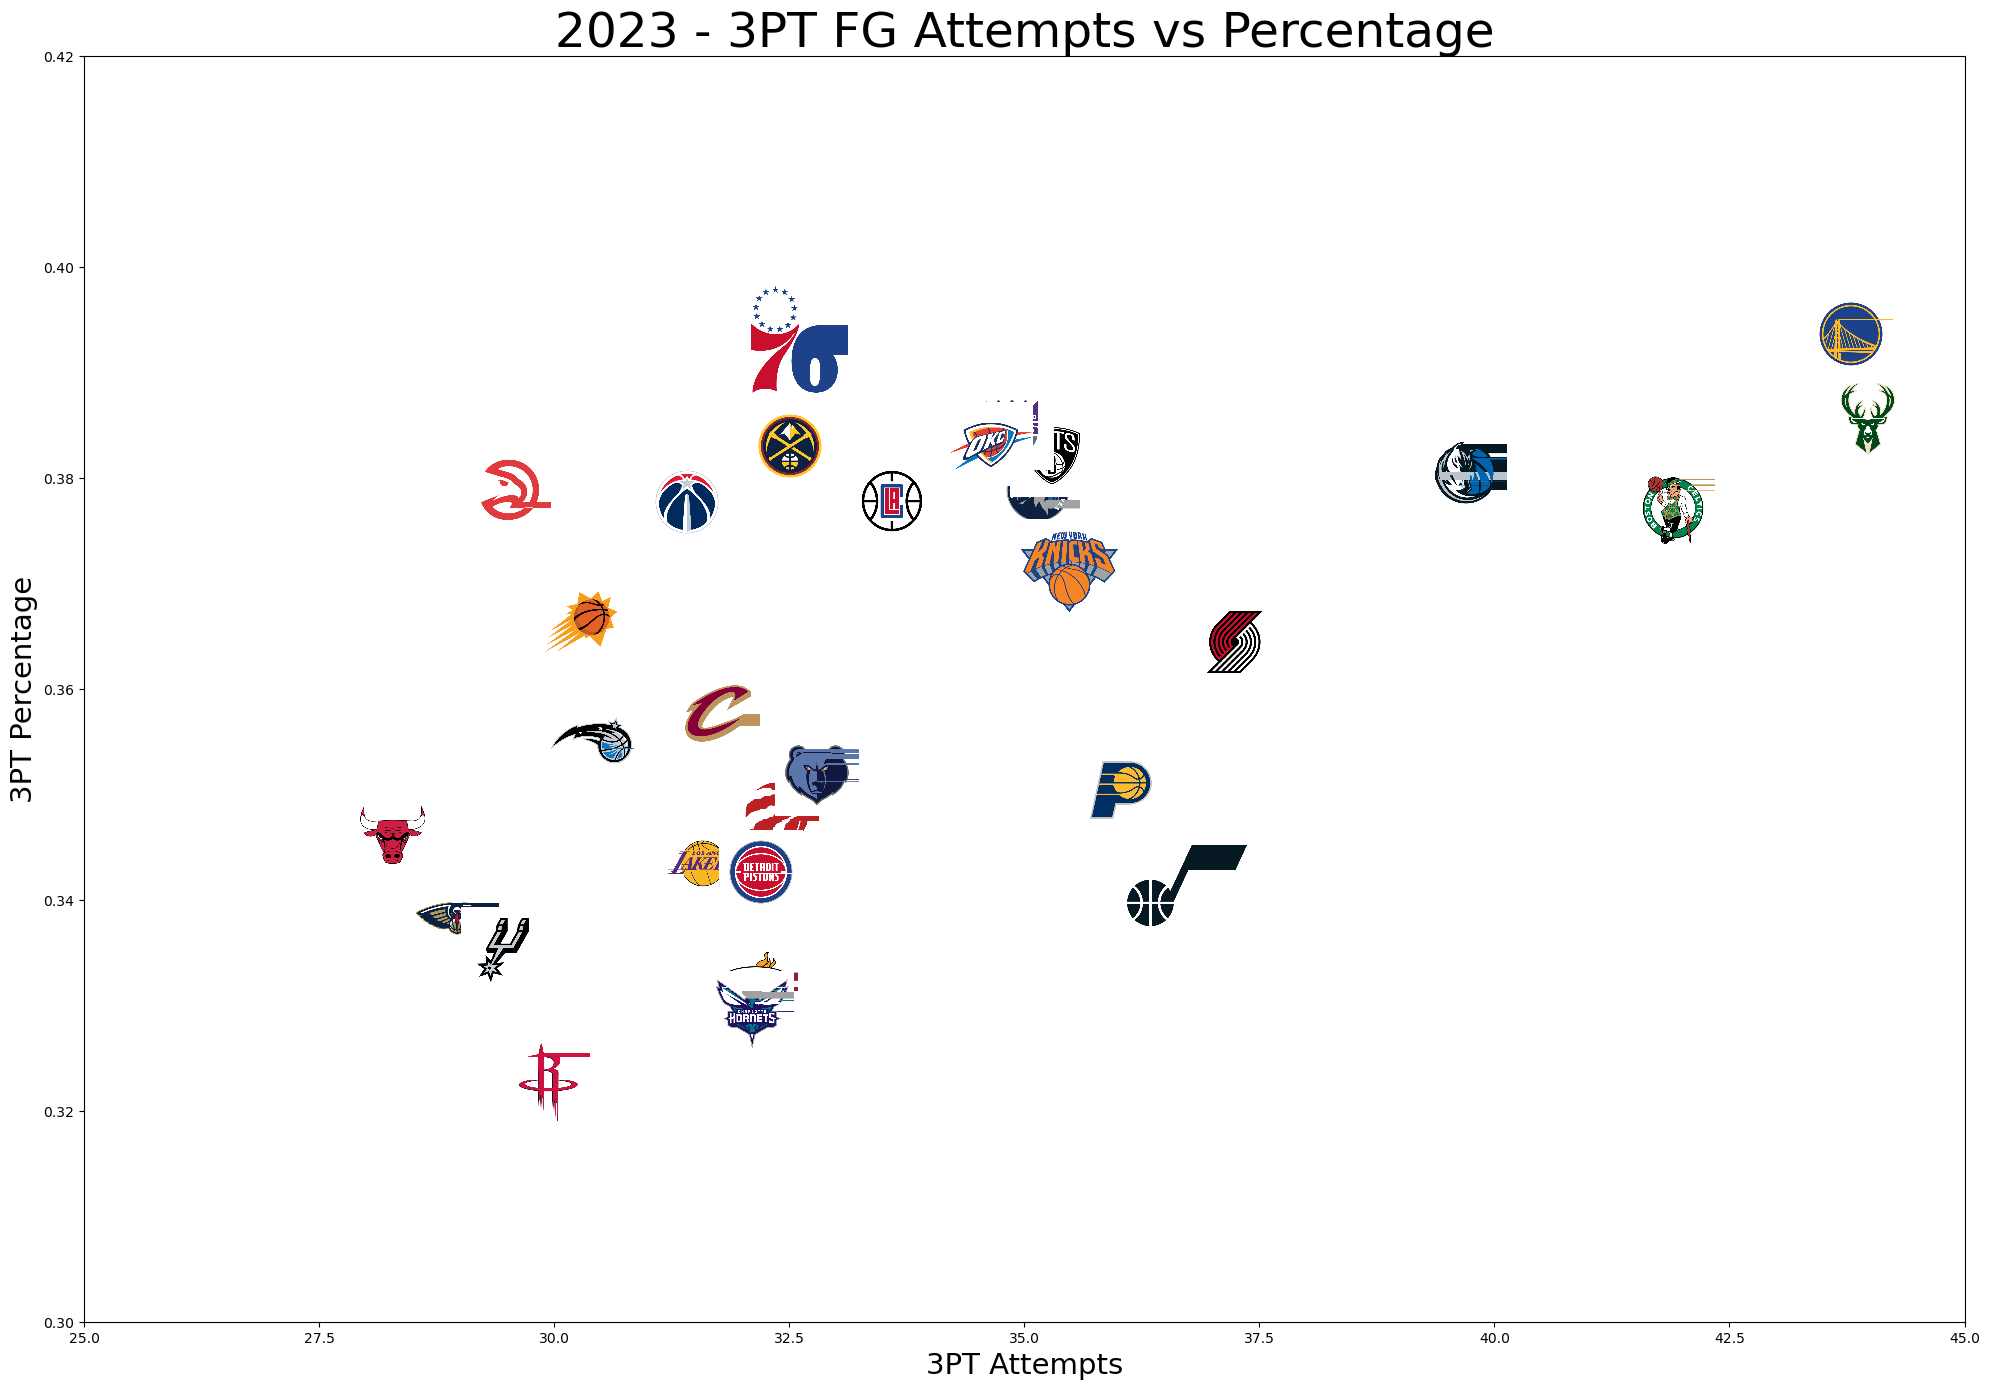

In [189]:
# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True

# Define the x and y variables
x = data['FG3A']
y = data['FG3_PCT']

# Define the image paths
paths = data['path']

# Define the plot 
fig, ax = plt.subplots()

# Load the data into the plot
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False)
    ax.add_artist(ab)

# Plot parameters
plt.xlim(25, 45);
plt.ylim(.30, .42);
plt.title("2023 - 3PT FG Attempts vs Percentage", fontdict={'fontsize': 35});
plt.xlabel("3PT Attempts", fontdict={'fontsize' : 21});
plt.ylabel("3PT Percentage", fontdict={'fontsize' : 21});